# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 8


### Zadanie 1

1. Wczytaj plik `mieszkania.csv`, np. za pomocą:
    - biblioteki [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (`read_csv`),
    - biblioteki [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) (`genfromtxt`),
    - biblioteki [`csv`](https://docs.python.org/3/library/csv.html) (`reader`).
1. Usuń nieprawidłowe dane np. wiersz zawierający wartość `-` lub wartość $0$ powinien zostać usunięty.
1. Zamień wartości liczbowe w formacie tekstowym na typ liczbowy.
1. Wyświetl **funkcję masy prawdopodobieństwa** wartości mieszkania dla różnych rodzajów "transakcji rynkowych". Podpowiedź: możesz skożystać z funkcji `displot` z modułu `seaborn` (jeżeli nie posiadasz to możesz zainstalować za pomocą `pip install seaborn`). Zwróć uwagę na argumenty: `x`, `hue`, `kind`, `fill`.
1. Wyświetl wszystkie trzy powyższe funkcje (dla ogółu, rynku pierwotnego i wtórnego) na jednym wykresie.
1. Opisz wyniki.

_Informacja odnośnie zbioru danych:_

- _Prezentowane dane dotyczące wielkości sprzedaży oraz cen nieruchomości zostały pobrane z GUSu i opracowane na podstawie informacji pozyskanych z Rejestru Cen Nieruchomości (RCN) – do 31 lipca Rejestru Cen i Wartości Nieruchomości (RCiWN) –  prowadzonego przez starostwa powiatowe i prezydentów miast na prawach powiatu przy wykorzystaniu informacji pochodzących z aktów notarialnych. Obserwacji podlegają tylko te transakcje kupna/sprzedaży nieruchomości, które zostały zawarte w trakcie badanego okresu oraz zostały zarejestrowane w RCN przed datą przekazania wyciągu z rejestru do Głównego Urzędu Statystycznego. Prezentowane są dane dla lokali mieszkalnych znajdujących się w budynkach wielorodzinnych (potocznie mieszkania w blokach), bez informacji o domach jednorodzinnych._
- _Prezentowane dane dotyczą sprzedaży o charakterze rynkowym tj. sprzedaży na wolnym rynku (z pewnymi wyłączeniami, np. sprzedaży między stronami spokrewnionymi) oraz sprzedaży przetargowej. W przypadku braku odpowiedniej informacji w zbiorach pochodzących z RCN (do 31 lipca 2021 r. – RCiWN), podział na rynek pierwotny i wtórny został przeprowadzony przyjmując założenie, że sprzedaż na rynku pierwotnym dotyczy transakcji dokonywanych na wolnym rynku, gdzie stroną sprzedającą jest osoba prawna i średnia cena za 1 m2 powierzchni użytkowej lokalu wynosi co najmniej 2 000 zł. Do transakcji na rynku wtórnym zaliczono pozostałe transakcje rynkowe przeprowadzone na wolnym rynku oraz sprzedaż przetargową. W grudniu 2021 r. zasilono BDL danymi ostatecznymi za lata 2010-2014, które dotyczą większej liczby transakcji kupna-sprzedaży lokali mieszkalnych w porównaniu do danych wcześniej opublikowanych przez GUS. Od roku 2020 brak danych dla miasta Koszalin oraz niekompletne dane dla miasta Szczecin._
- _Mediana cen za 1 m2 lokali mieszkalnych sprzedanych w ramach transakcji rynkowych_
- _Data ostatniej aktualizacji:	16.12.2021_
- Przypisy:	
  - `-` oznacza brak informacji z powodu: zmiany poziomu prezentacji, zmian wprowadzonych do wykazu jednostek terytorialnych lub modyfikacji listy cech w danym okresie sprawozdawczym; 
  - `n` - Dana jeszcze niedostępna, będzie dostępna; 
  - `x` - Brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe; 
  - `X` - Zmiany metodologiczne, brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe
  

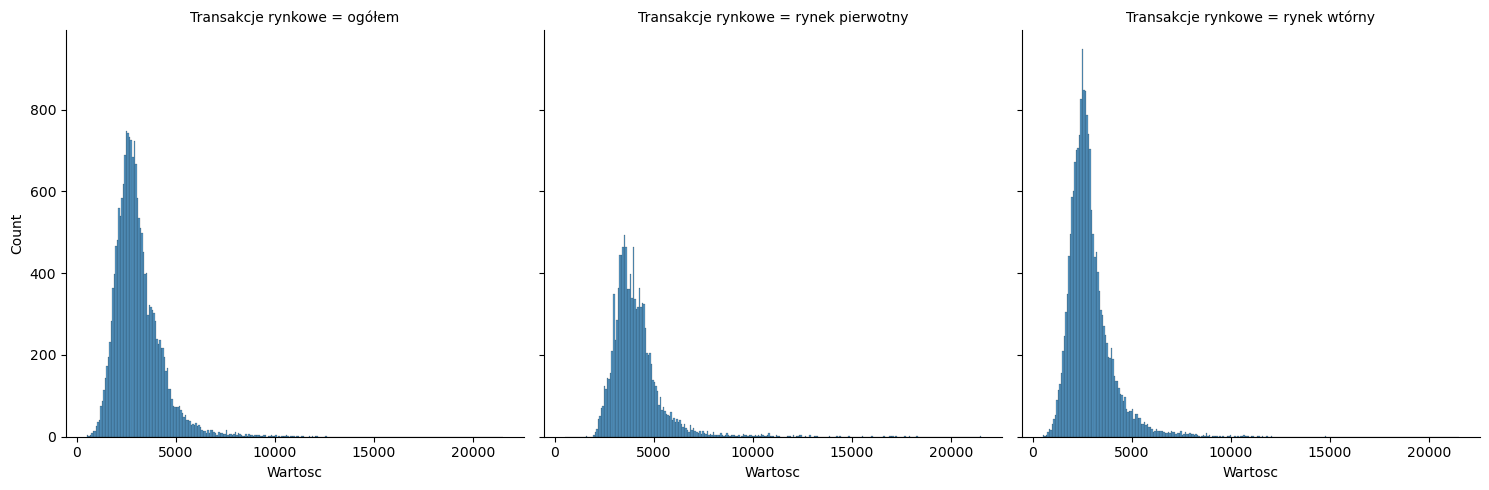

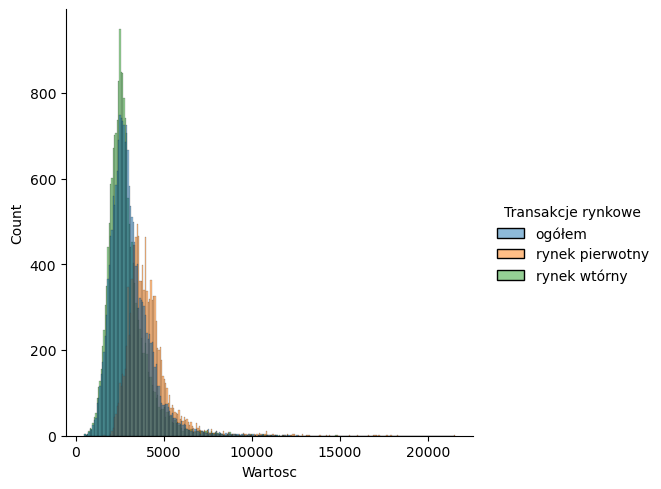

In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

mieszkania_data = pd.read_csv('mieszkania.csv', delimiter=';')
mieszkania_data

# mieszkania_data = np.genfromtxt('mieszkania.csv', delimiter=';', dtype=str, skip_header=1)
# mieszkania_data

# mieszkania_data = []
# with open('mieszkania.csv', mode='r') as plik_csv:
#     czytnik_csv = csv.reader(plik_csv)
#     for linia in czytnik_csv:
#         mieszkania_data.append(linia)
# mieszkania_data  = mieszkania_data[1:]
# mieszkania_data[0]

mieszkania_data = mieszkania_data.replace('-', pd.NA).dropna()
mieszkania_data = mieszkania_data.replace('0', pd.NA).dropna()

columns_to_change_type = ['Kod', 'Rok', 'Wartosc']
for name in columns_to_change_type:
    mieszkania_data[name] = mieszkania_data[name].astype('int64')

sns.displot(data=mieszkania_data, x='Wartosc', kind='hist', fill=True, col='Transakcje rynkowe')
sns.displot(data=mieszkania_data, x='Wartosc', hue='Transakcje rynkowe', kind='hist', fill=True)


### Zadanie 2 (kontynuacja poprzedniego)
1. Wyświetl dystrybuantę (funkcja `ecdfplot`) wartości mieszkań dla rodzaju transakcji `ogólny`.
1. Odczytaj "na oko" z wykresu ile % mieszkań sprzedaje się za cenę poniżej 4 tys. zł.

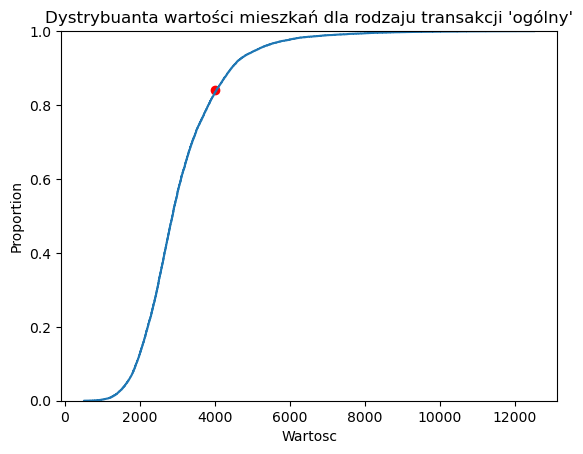

In [2]:
mieszkania_data = mieszkania_data[mieszkania_data['Transakcje rynkowe'] == 'ogółem']
sns.ecdfplot(data=mieszkania_data, x='Wartosc')
plt.title("Dystrybuanta wartości mieszkań dla rodzaju transakcji 'ogólny'")
plt.scatter(4000, 0.84, color='red')
# ok. 84%

### Zadanie 3

Opis zbioru danych znajduje się w pliku z danymi.

1. Wczytaj plik `boston.txt` (zwróć uwagę na format pliku). Nie modyfikuj pliku.
> Podpowiedź: możesz użyć funkcji `read_csv` z biblioteki pandas korzystając z parametrów `skiprows`, `header`, `sep`.
1. Wyświetl funkcję masy prawdopodobieństwa dla ceny mieszkań.
1. Wyświetl funkcję masy prawdopodobieństwa dla dwóch zmiennych (`x` i `y`): `MEDV`, `RM`. W jakiej cenie i liczbie pokoi sprzedaje się najwięcej mieszkań? Co jeszcze można odczytać z wykresu?
1. Sprawdź jeszcze jeden dowolny atrybut i opisz wyniki.


In [106]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('boston.txt', skiprows=22, sep=r'\s+', names=names)
for i in range(1, len(boston_data), 2):
    for j in range(0, 3):
        boston_data.at[i - 1, names[11 + j]] = boston_data.at[i, names[j]]
boston_data.drop(boston_data.index[boston_data.index % 2 == 1], inplace=True)
boston_data.reset_index(drop=True, inplace=True)
boston_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


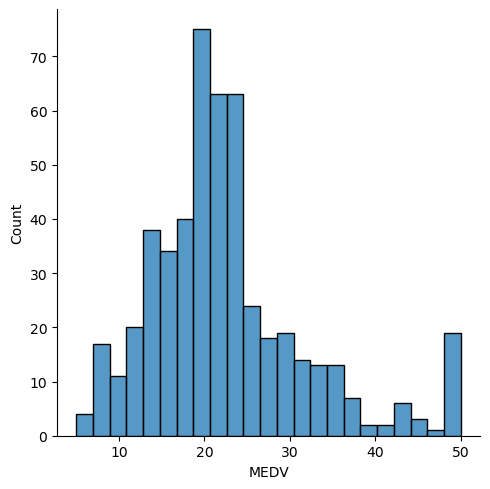

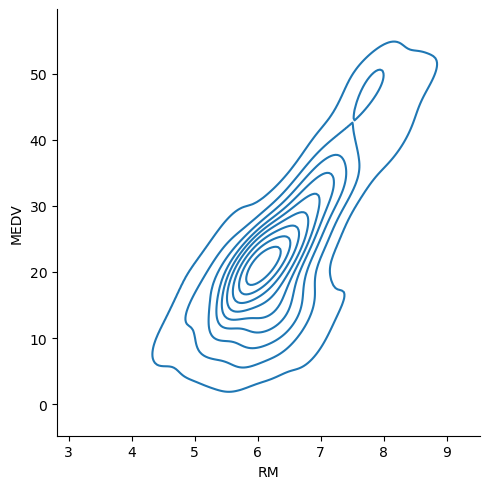

In [107]:
columns_to_change_type = ['MEDV', 'RM', 'CRIM', 'B'] 
for name in columns_to_change_type:
    boston_data[name] = boston_data[name].astype('float64')

sns.displot(data=boston_data, x='MEDV', kind='hist', fill=True)
sns.displot(data=boston_data, x='RM', y='MEDV', kind='kde')
# Ok 6 mieszkan przy medianie 20

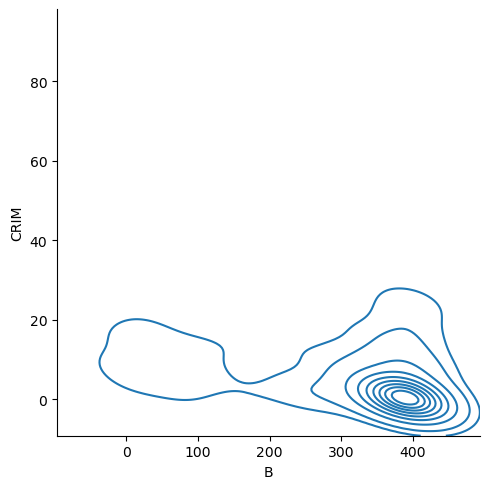

In [108]:
sns.displot(data=boston_data, x='B', y='CRIM', kind='kde')